In [1]:
#Abrar Altaay
#ID: 801166376
#Homework 3

#Github: https://github.com/aaltaay1/Machine-Learning-4105/blob/main/Homework3.ipynb

#Cell 12 shows the accuracy prec, and recall for question 1
#Cell 24+25 show the answers to Question 2 
#Cell 30 shows question 30

In [2]:
from sklearn.datasets import load_breast_cancer 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
import seaborn as sns 
import warnings 
from matplotlib.colors import ListedColormap 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
#variable to hold data
breast_cancer = load_breast_cancer()

input_data = pd.DataFrame(breast_cancer.data)
input_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#data labels
labels=breast_cancer.target
labels.shape

(569,)

In [5]:
#reshape data into usefull info
labels = np.reshape(labels,(569,1))
#Add label to data set
final_breast_data = np.concatenate([input_data,labels],axis=1)

In [6]:
#data set to create proper tabel
breast_dataset = pd.DataFrame(final_breast_data)
features = breast_cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
features_labels = np.append(features,'test')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,test
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
#spliting the outcome of data
X =  breast_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,29]].values
Y = breast_dataset.iloc[:, 30].values

#Split the data set into test and verifcaiton 80.20
from sklearn.model_selection import train_test_split
import random
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=.2, random_state = 4) 

In [9]:
#Standardize the values for overfitting
#feature scaling data between 0 and 1 for better reading
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
#Make an instance classifier of the object LogisticRegression and give random_state =
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [11]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([1., 1., 0., 0., 0., 0., 1., 1., 0.])

In [12]:
#Model evualtion metrics to get more accurate results
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[34,  0],
       [ 5, 75]], dtype=int64)

In [13]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, 
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)

avg = (accuracy + precision + recall)/3
    
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:",recall)
print("Average",avg)

Accuracy: 0.956140350877193
Precision: 1.0
Recall: 0.9375
Average 0.964546783625731


Text(0.5, 257.44, 'Predicted label')

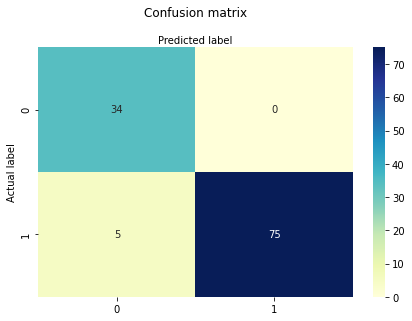

In [14]:
#matrix using matp
#visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
#### Qustion 2

In [16]:
# First, import the PCA function
# sperate the  features, target and scaler

from sklearn.decomposition import PCA 

x = breast_dataset.loc[:, features].values 
y = breast_dataset.loc[:,['test']].values 
x = StandardScaler().fit_transform(x) 


accuracyGraph = []
precisionGraph = []
recallGraph = []

In [17]:
# to go through all K values, a k loop is needed for all the inputes up to 30

for k in range(1, 31):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)]) 
    finalDf = pd.concat([principalDf, breast_dataset[['test']]], axis = 1)
    
    outcome = finalDf.pop("test")
    
    X2 = finalDf.values
    Y2 = outcome.values

    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, train_size=0.8, test_size = 0.2, random_state = 4) 
    #Same rand value to see the most optimal K value
    
    classifier.fit(X_train, Y_train)
    
    # Creating a prediction 
    Y_pred = classifier.predict(X_test)

    # Using confusion matrix to obtain accuracy and other statistics
    from sklearn.metrics import confusion_matrix 
    cnf_matrix = confusion_matrix(Y_test, Y_pred) 
    from sklearn import metrics
    
    # Variables to hold the Accuracy, Precision, and Recall
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    
    # Saving the values to the appropriate list
    accuracyGraph.append(accuracy)
    precisionGraph.append(precision)
    recallGraph.append(recall)
    
    # Averaging the three values for avg
    New_Avg = (accuracy + precision + recall)/3
    
    #compare the old average from the first classifcation to the new one from 1 to 30
    #But use the most accurage model
    if avg < New_Avg: 
        avg = New_Avg
        index = k

In [18]:
# PCA function for the most optimal K value
# The most optimal K value was 8 for this test 

pca = PCA(n_components = index)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,index+1)]) 
finalDf = pd.concat([principalDf, breast_dataset[['test']]], axis = 1)

X2 = finalDf.values
Y2 = outcome.values

# Standard training and test set 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, train_size=0.8, test_size = 0.2, random_state = 4)

classifier.fit(X_train, Y_train)
    
#Create a prediction 
Y_pred = classifier.predict(X_test)

In [19]:
# Using confusion matrix to obtain accuracy and other statistics
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
from sklearn import metrics 

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("Final K value: ", index)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Final K value:  8


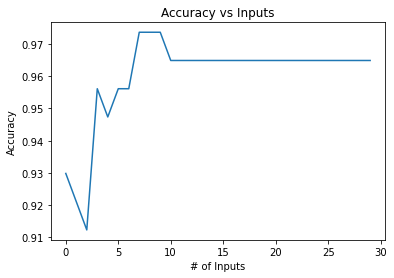

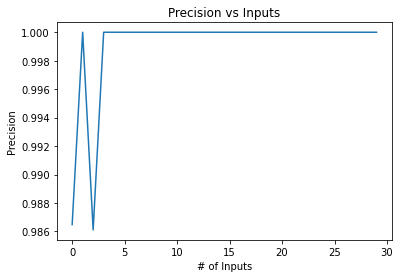

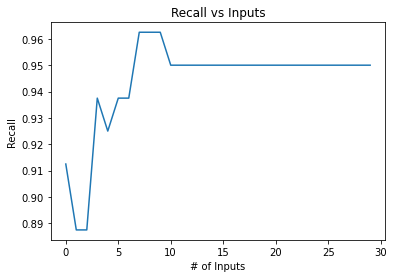

In [20]:
# Graph Accuracy
plt.plot(accuracyGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Inputs')
plt.show()

# Graph Precision
plt.plot(precisionGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Precision')
plt.title('Precision vs Inputs')
plt.show()

# Graph Precision
plt.plot(recallGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Recall')
plt.title('Recall vs Inputs')
plt.show()

In [21]:
### Question 3

In [22]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda_t = lda.fit_transform(X,Y)

Accuracy: 0.9298245614035088
Precision: 0.9152542372881356
Recall: 0.9747292418772563


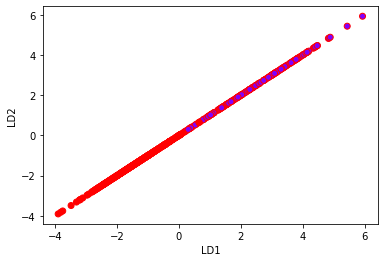

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2)
lda.fit(X_train,Y_train)
Y_pred = lda.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(lda_t[:,0],lda_t[:,0],c=y,cmap='rainbow',edgecolors='red')